<a href="https://colab.research.google.com/github/Deveshrai02/Intelligent_Manufacturing/blob/main/Warranty_Risk_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from ml.utils import load_feature_data
df = load_feature_data()
print(df.head())

ModuleNotFoundError: No module named 'ml'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vehicle_id                  10000 non-null  object 
 1   total_error_count           10000 non-null  int64  
 2   avg_cycle_time              10000 non-null  float64
 3   cycle_time_variance         10000 non-null  float64
 4   rework_ratio                10000 non-null  float64
 5   vendor_defect_ratio         10000 non-null  float64
 6   avg_torque                  10000 non-null  float64
 7   torque_deviation            10000 non-null  float64
 8   warranty_flag               10000 non-null  int64  
 9   feature_snapshot_timestamp  10000 non-null  object 
dtypes: float64(6), int64(2), object(2)
memory usage: 781.4+ KB


In [11]:
df.shape

(10000, 10)

In [12]:
df.describe()

,total_error_count,avg_cycle_time,cycle_time_variance,rework_ratio,vendor_defect_ratio,avg_torque,torque_deviation,warranty_flag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.674700,50.301176,34.949556,0.109956,0.041896,100.292689,5.970786,0.069500
std,14.387723,2.033603,20.709107,0.093844,0.115707,2.079434,2.070951,0.254315
min,2.000000,42.487400,2.433310,0.000000,0.000000,90.860400,1.813410,0.000000
25%,15.000000,49.083050,26.210350,0.040000,0.000000,99.096375,5.114705,0.000000
50%,28.000000,50.097400,31.552900,0.100000,0.000000,100.105000,5.626200,0.000000
75%,38.000000,51.146025,37.042450,0.160000,0.000000,101.159000,6.113945,0.000000
max,93.000000,64.254800,246.094000,0.800000,1.000000,115.974000,19.634900,1.000000


In [13]:
df['warranty_flag'].value_counts()

warranty_flag
0    9305
1     695
Name: count, dtype: int64

In [14]:
df.corr(numeric_only=True)

,total_error_count,avg_cycle_time,cycle_time_variance,rework_ratio,vendor_defect_ratio,avg_torque,torque_deviation,warranty_flag
total_error_count,1.000000,0.253288,0.375393,0.199242,0.001500,0.245309,0.436381,0.131745
avg_cycle_time,0.253288,1.000000,0.561588,0.284374,-0.007962,0.352891,0.555192,0.191244
cycle_time_variance,0.375393,0.561588,1.000000,0.382821,-0.010039,0.458157,0.734868,0.252219
rework_ratio,0.199242,0.284374,0.382821,1.000000,0.008673,0.278732,0.439748,0.147257
vendor_defect_ratio,0.001500,-0.007962,-0.010039,0.008673,1.000000,0.000182,-0.000237,-0.001542
avg_torque,0.245309,0.352891,0.458157,0.278732,0.000182,1.000000,0.520709,0.195588
torque_deviation,0.436381,0.555192,0.734868,0.439748,-0.000237,0.520709,1.000000,0.280700
warranty_flag,0.131745,0.191244,0.252219,0.147257,-0.001542,0.195588,0.280700,1.000000


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

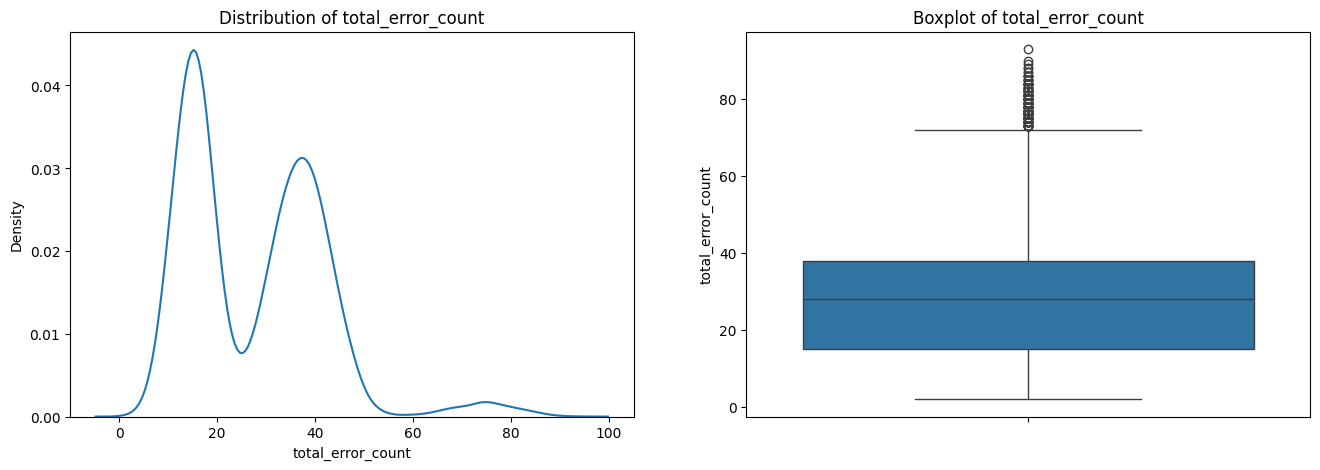

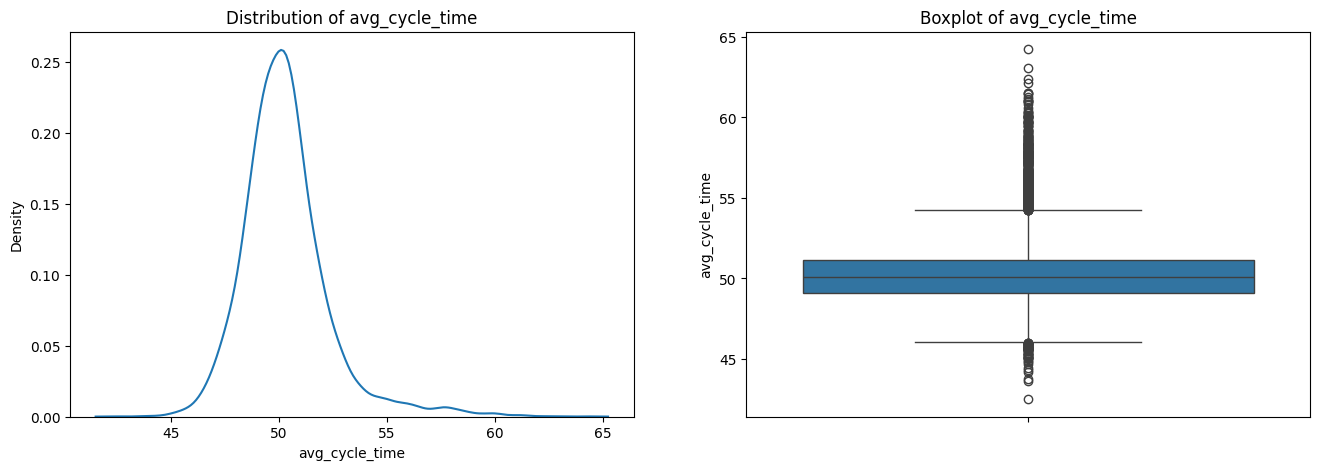

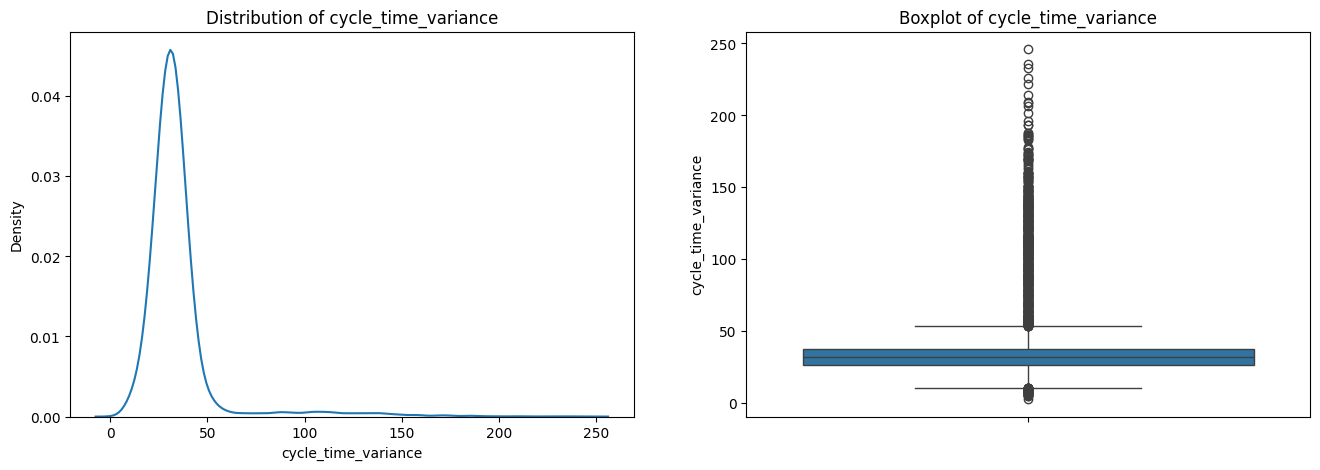

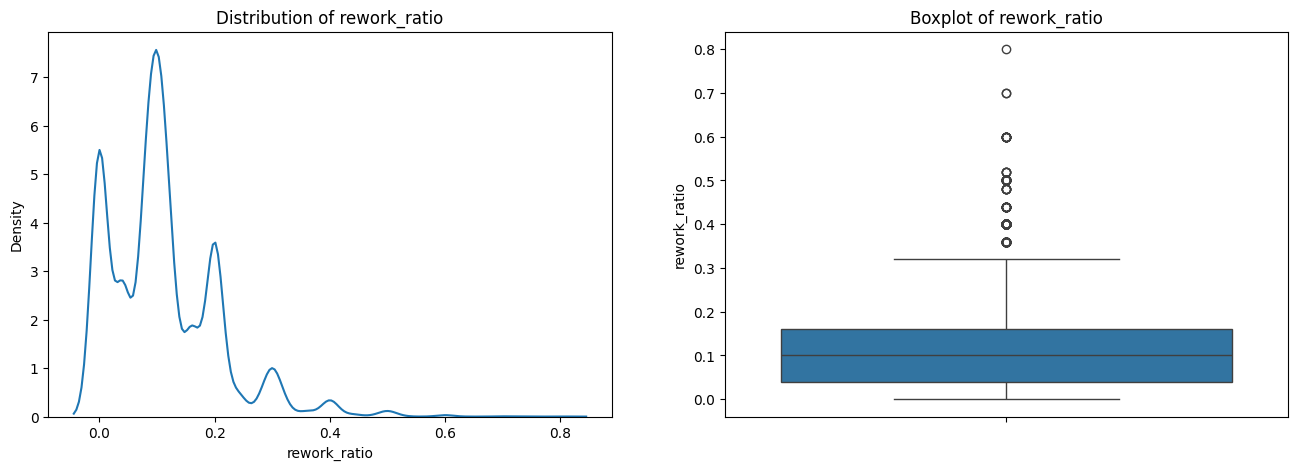

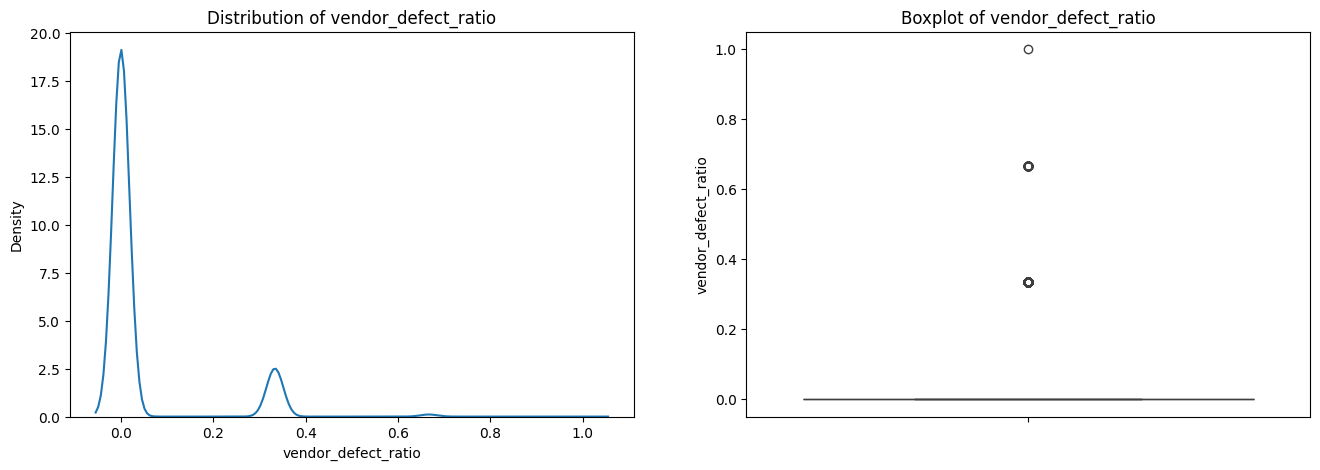

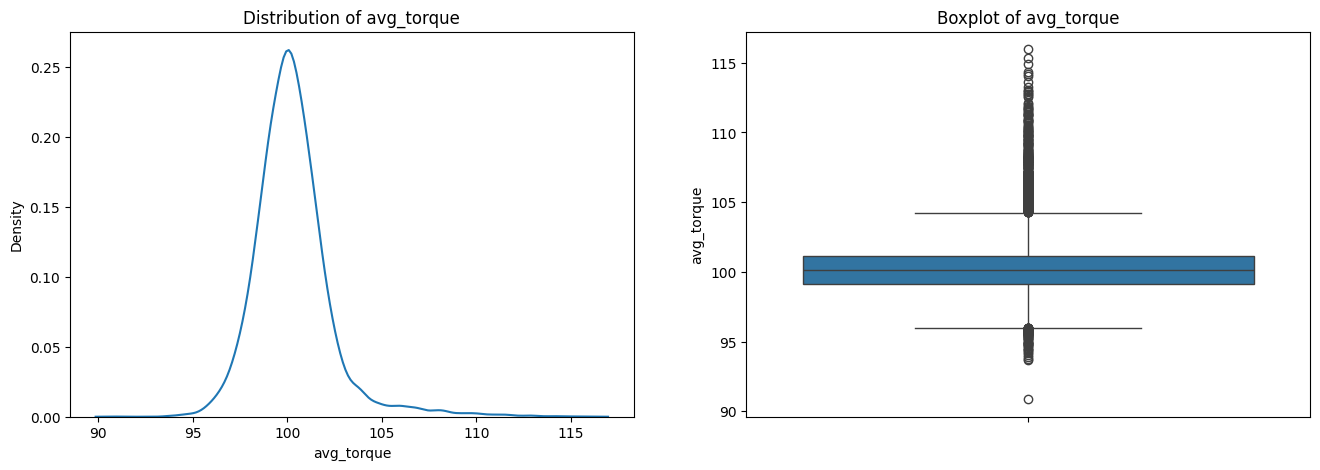

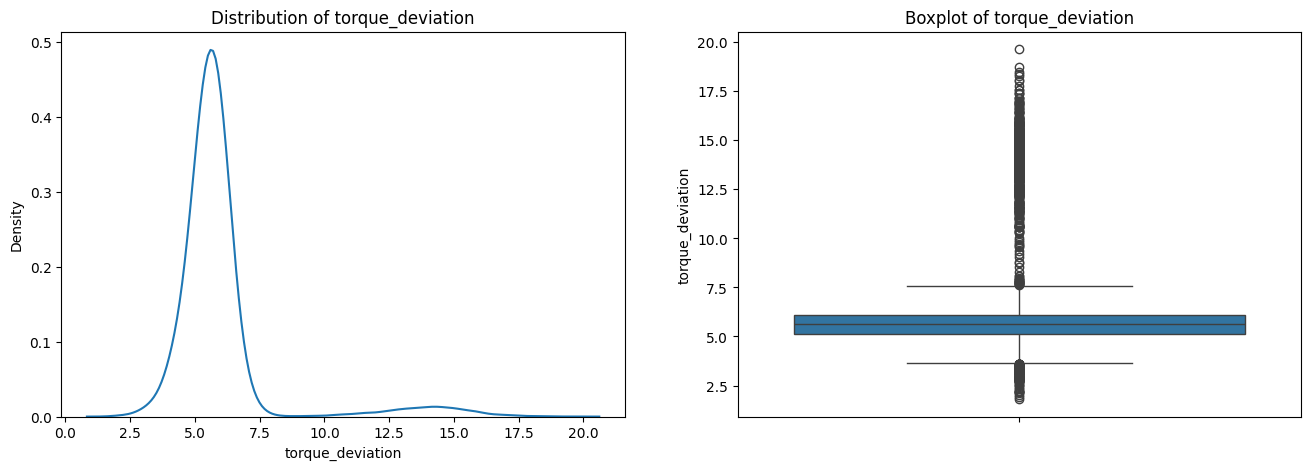

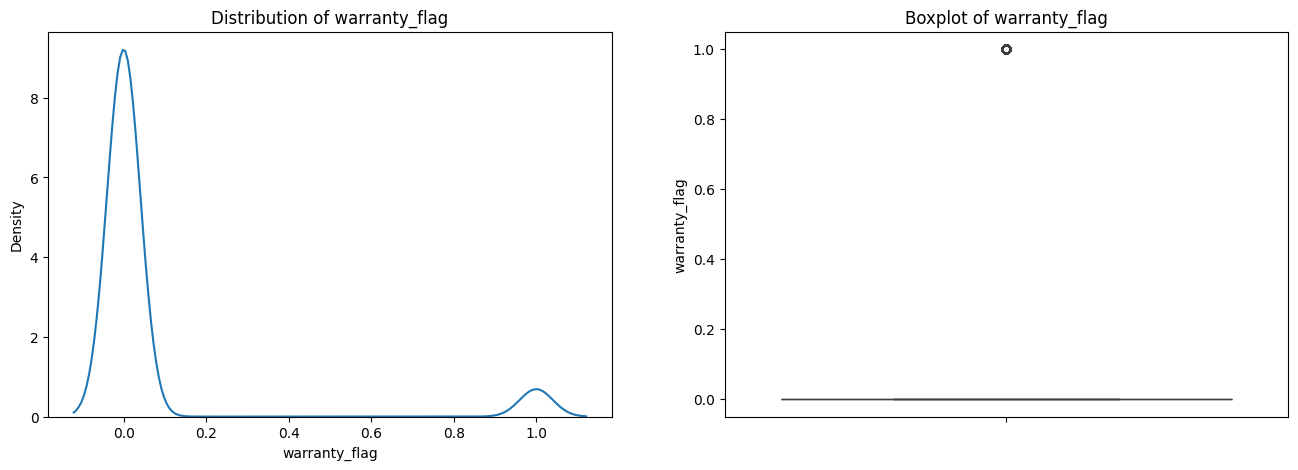

In [16]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df[col]) # Using histplot with kde for distribution
    plt.title(f'Distribution of {col}')
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col]) # Using y for vertical boxplot
    plt.title(f'Boxplot of {col}')
    plt.show()

In [17]:
df.select_dtypes(np.number).skew().sort_values()

total_error_count      0.933922
rework_ratio           1.288583
avg_cycle_time         1.367058
avg_torque             1.644789
vendor_defect_ratio    2.646442
torque_deviation       3.326661
warranty_flag          3.386240
cycle_time_variance    4.234409
dtype: float64

In [18]:
outlier_count = {}
for col in df.select_dtypes(include=np.number).columns:
  percentile25 = df[col].quantile(0.25)
  percentile75 = df[col].quantile(0.75)
  iqr = percentile75 - percentile25
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  count = 0
  for i in df[col]:
    if i > upper_limit or i < lower_limit:
      count= count+1
  if(count!=0):
    outlier_count[col] = count
outlier_df = pd.DataFrame(outlier_count.items(), columns=['Column Name', 'Outlier Count'])
display(outlier_df)


,Column Name,Outlier Count
0,total_error_count,188
1,avg_cycle_time,487
2,cycle_time_variance,600
3,rework_ratio,242
4,vendor_defect_ratio,1205
5,avg_torque,453
6,torque_deviation,726
7,warranty_flag,695


In [19]:
df=df.drop('feature_snapshot_timestamp' , axis=1)

In [20]:
df_new=df.drop('vehicle_id' , axis=1)

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_error_count    10000 non-null  int64  
 1   avg_cycle_time       10000 non-null  float64
 2   cycle_time_variance  10000 non-null  float64
 3   rework_ratio         10000 non-null  float64
 4   vendor_defect_ratio  10000 non-null  float64
 5   avg_torque           10000 non-null  float64
 6   torque_deviation     10000 non-null  float64
 7   warranty_flag        10000 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 625.1 KB


In [22]:
X = df_new.drop(columns='warranty_flag')
y = df_new['warranty_flag']

In [23]:
X.shape , y.shape

((10000, 7), (10000,))

In [24]:
yj_cols = []
log_cols = []

for col in X.columns:
    if (
        X[col].max() < 1e6 and
        X[col].skew() < 2 and
        X[col].nunique() > 10
    ):
        yj_cols.append(col)
    else:
        log_cols.append(col)


In [25]:
len(yj_cols) , len(log_cols)

(4, 3)

In [26]:
yj_cols , log_cols

(['total_error_count', 'avg_cycle_time', 'rework_ratio', 'avg_torque'],
 ['cycle_time_variance', 'vendor_defect_ratio', 'torque_deviation'])

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder , FunctionTransformer

In [28]:
def clip_function(x):
    return np.clip(x, -0.999, None)

numeric_log_pipe = Pipeline([
    ("clip", FunctionTransformer(clip_function, validate=False)),
    ("log", FunctionTransformer(np.log1p, validate=False))
])

numeric_yj_pipe = Pipeline([
    ("power", PowerTransformer(method="yeo-johnson"))
])

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num_log", numeric_log_pipe, log_cols),
        ("num_yj", numeric_yj_pipe, yj_cols)
    ],
    remainder="passthrough"
)

In [30]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_log',
                                 Pipeline(steps=[('clip',
                                                  FunctionTransformer(func=<function clip_function at 0x17660f1f0>)),
                                                 ('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>))]),
                                 ['cycle_time_variance', 'vendor_defect_ratio',
                                  'torque_deviation']),
                                ('num_yj',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['total_error_count', 'avg_cycle_time',
                                  'rework_ratio', 'avg_torque'])])

In [31]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [32]:
X_train.shape, X_test.shape , y_train.shape , y_test.shape

((8000, 7), (2000, 7), (8000,), (2000,))

In [33]:
X_train_trf = preprocessor.fit_transform(X_train)

In [34]:
print("First 5 rows of X_train_transformed after converting to int:")
print(X_train_trf[:5, :])

First 5 rows of X_train_transformed after converting to int:
[[ 3.54242202e+00  0.00000000e+00  1.60767636e+00  6.14713050e-01
  -6.58452082e-01  1.36335515e+00 -1.66533454e-16]
 [ 3.35395202e+00  0.00000000e+00  1.94876464e+00  5.56341382e-01
   8.61336924e-01  3.14524489e-01 -2.77555756e-17]
 [ 4.57174266e+00  0.00000000e+00  2.58589010e+00  2.25173384e+00
   1.61539302e+00  7.25224825e-01  1.66533454e-16]
 [ 3.36649551e+00  5.10845624e-01  1.96968806e+00  2.39529185e-01
  -1.28134914e+00 -7.67611863e-01 -2.77555756e-17]
 [ 3.11975359e+00  0.00000000e+00  1.70067253e+00 -6.75846756e-01
  -7.09618016e-01 -1.48414249e+00  5.55111512e-17]]


In [35]:
X_test_trf = preprocessor.transform(X_test)

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept


LogisticRegression()

In [37]:
y_pred = lr.predict(X_test_trf)
print(pd.Series(y_pred).value_counts())

0    1998
1       2
Name: count, dtype: int64


/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [38]:
accuracy_score(y_test,y_pred)

0.94

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1880
           1       0.50      0.01      0.02       120

    accuracy                           0.94      2000
   macro avg       0.72      0.50      0.49      2000
weighted avg       0.91      0.94      0.91      2000



In [40]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)


# Metrics
accuracy  = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall    = recall_score(y_test, y_pred, average="weighted")
cm        = confusion_matrix(y_test,y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print("\nConfusion Matrix:")
print(cm)

Accuracy  : 0.9400
Precision : 0.9140
Recall    : 0.9400

Confusion Matrix:
[[1879    1]
 [ 119    1]]


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC

In [42]:
rf = RandomForestClassifier(n_estimators=100,
                              random_state=42,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15 )
rf.fit(X_train_trf , y_train)

RandomForestClassifier(max_depth=15, max_features=0.75, max_samples=0.5,
                       random_state=42)

In [43]:
y_pred = rf.predict(X_test_trf)

In [44]:
accuracy  = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall    = recall_score(y_test, y_pred, average="weighted")
cm        = confusion_matrix(y_test,y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print("\nConfusion Matrix:")
print(cm)

Accuracy  : 0.9370
Precision : 0.9043
Recall    : 0.9370

Confusion Matrix:
[[1869   11]
 [ 115    5]]


In [45]:
svc= SVC(kernel='rbf',C=10)
svc.fit(X_train_trf,y_train)

SVC(C=10)

In [46]:
y_pred = svc.predict(X_test_trf)
accuracy  = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall    = recall_score(y_test, y_pred, average="weighted")
cm        = confusion_matrix(y_test,y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print("\nConfusion Matrix:")
print(cm)

Accuracy  : 0.9400
Precision : 0.8836
Recall    : 0.9400

Confusion Matrix:
[[1880    0]
 [ 120    0]]


/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
gb = GradientBoostingClassifier(n_estimators=500)
gb.fit(X_train_trf,y_train)
y_pred = gb.predict(X_test_trf)
accuracy  = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall    = recall_score(y_test, y_pred, average="weighted")
cm        = confusion_matrix(y_test,y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print("\nConfusion Matrix:")
print(cm)

Accuracy  : 0.9325
Precision : 0.9020
Recall    : 0.9325

Confusion Matrix:
[[1857   23]
 [ 112    8]]


In [48]:
ab = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ab.fit(X_train_trf,y_train)
y_pred = ab.predict(X_test_trf)
accuracy  = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall    = recall_score(y_test, y_pred, average="weighted")
cm        = confusion_matrix(y_test,y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print("\nConfusion Matrix:")
print(cm)

Accuracy  : 0.9400
Precision : 0.8836
Recall    : 0.9400

Confusion Matrix:
[[1880    0]
 [ 120    0]]


/Users/dm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
import pickle

pickle.dump(df_new,open('df.pkl','wb'))
pickle.dump(preprocessor,open('pipe.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))
